In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer=load_breast_cancer()
#print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [2]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=56)

mlp=MLPClassifier(random_state=56)
mlp.fit(Xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=56, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [3]:
print('Accuracy of multilayer perceptron on train data: {:.3f}%'.format(mlp.score(Xtrain,ytrain)*100))
print('Accuracy of multilayer perceptron on test data: {:.3f}%'.format(mlp.score(Xtest,ytest)*100))

Accuracy of multilayer perceptron on train data: 92.019%
Accuracy of multilayer perceptron on test data: 93.007%


In [4]:
print('Max: ln{}'.format(cancer.data.max(axis=0)))

Max: ln[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [5]:
scaler= StandardScaler()
Xtrain_scaled=scaler.fit(Xtrain).transform(Xtrain)
Xtest_scaled=scaler.fit(Xtest).transform(Xtest)

In [6]:
mlp.fit(Xtrain_scaled,ytrain)

print('Accuracy of multilayer perceptron on scaled train data: {:.3f}%'.format(mlp.score(Xtrain_scaled,ytrain)*100))
print('Accuracy of multilayer perceptron on scaled test data: {:.3f}%'.format(mlp.score(Xtest_scaled,ytest)*100))

Accuracy of multilayer perceptron on scaled train data: 99.296%
Accuracy of multilayer perceptron on scaled test data: 97.902%


D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
mlp=MLPClassifier(max_iter=1000,random_state=56)

In [8]:
mlp.fit(Xtrain_scaled,ytrain)
#Will converge now
print('Accuracy of multilayer perceptron on scaled train data: {:.3f}%'.format(mlp.score(Xtrain_scaled,ytrain)*100))
print('Accuracy of multilayer perceptron on scaled test data: {:.3f}%'.format(mlp.score(Xtest_scaled,ytest)*100))

Accuracy of multilayer perceptron on scaled train data: 99.531%
Accuracy of multilayer perceptron on scaled test data: 97.902%


Text(0, 0.5, 'Input features')

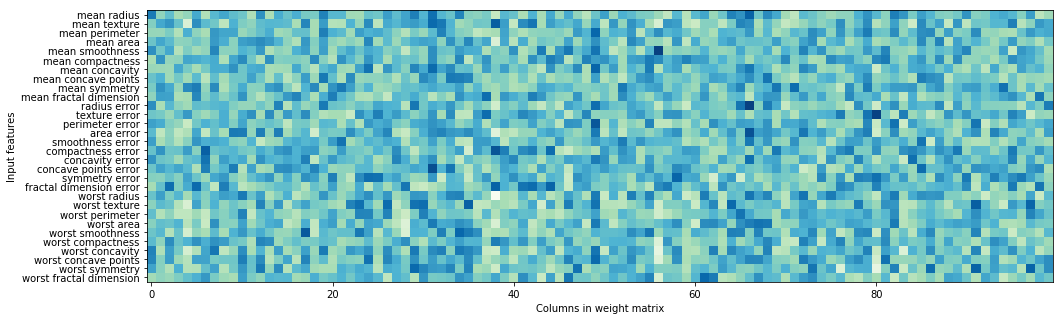

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(cancer.data.shape[1]),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input features')